In [ ]:
col_list = ["date","price"]
import pandas as pd
df = pd.read_csv("Lentis Barishal.csv", usecols=col_list,parse_dates = ['date'])
df.head()

,date,price
0,2006-08-15,54.0
1,2006-09-15,54.0
2,2007-02-15,53.0
3,2007-03-15,50.0
4,2007-04-15,50.0


In [ ]:
df.describe()

,price
count,168.000000
mean,79.230207
std,14.945135
min,50.000000
25%,69.000000
50%,80.250000
75%,88.000000
max,111.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    168 non-null    datetime64[ns]
 1   price   168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [ ]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2006-08-15,54.0
1,2006-09-15,54.0
2,2007-02-15,53.0
3,2007-03-15,50.0
4,2007-04-15,50.0


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from fbprophet import Prophet
m = Prophet(interval_width = 0.95, weekly_seasonality = False,yearly_seasonality = False)
m.fit(df)
#Check Interval Width between 0.75 to 0.95 and weekly Seasonality and Yearly Seasonality True\False

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


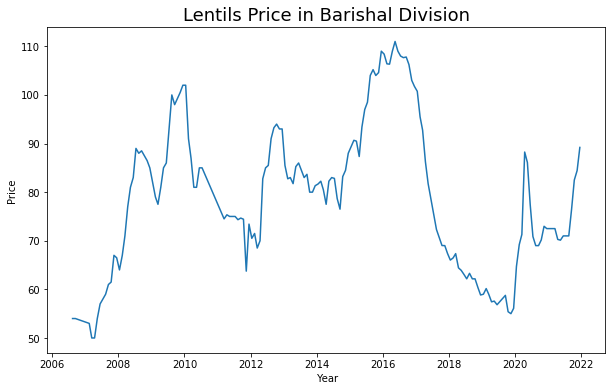

In [ ]:
plt.figure(facecolor='w',figsize=(10, 6))
plt.plot(df.ds,df.y)
plt.title('Lentils Price in Barishal Division',size = 18)
plt.xlabel(' Year')
plt.ylabel('Price')
plt.show()

In [ ]:
future = m.make_future_dataframe(periods = 50,freq ='SMS')
forecast = m.predict(future)
forecast.tail(16)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
202,2023-06-01,62.327236,36.789118,88.884060,61.402606,63.172786,0.0,0.0,0.0,0.0,0.0,0.0,62.327236
203,2023-06-15,62.197262,36.223900,86.601548,61.238265,63.082417,0.0,0.0,0.0,0.0,0.0,0.0,62.197262
204,2023-07-01,62.048720,38.407800,84.655683,61.050448,62.978774,0.0,0.0,0.0,0.0,0.0,0.0,62.048720
205,2023-07-15,61.918746,34.974727,84.355288,60.881328,62.887445,0.0,0.0,0.0,0.0,0.0,0.0,61.918746
206,2023-08-01,61.760921,37.970325,85.994099,60.665521,62.773525,0.0,0.0,0.0,0.0,0.0,0.0,61.760921
207,2023-08-15,61.630947,37.404803,85.857859,60.487727,62.673999,0.0,0.0,0.0,0.0,0.0,0.0,61.630947
208,2023-09-01,61.473121,38.213990,87.949422,60.271801,62.553146,0.0,0.0,0.0,0.0,0.0,0.0,61.473121
209,2023-09-15,61.343147,35.340938,85.480403,60.101514,62.453260,0.0,0.0,0.0,0.0,0.0,0.0,61.343147
210,2023-10-01,61.194605,34.362287,86.421466,59.926489,62.339031,0.0,0.0,0.0,0.0,0.0,0.0,61.194605
211,2023-10-15,61.064631,36.164543,84.646663,59.776945,62.239081,0.0,0.0,0.0,0.0,0.0,0.0,61.064631


In [ ]:
df.shape

(168, 2)

In [ ]:
future.shape

(218, 1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Forecasting Price of Lentils in Barishal Division')

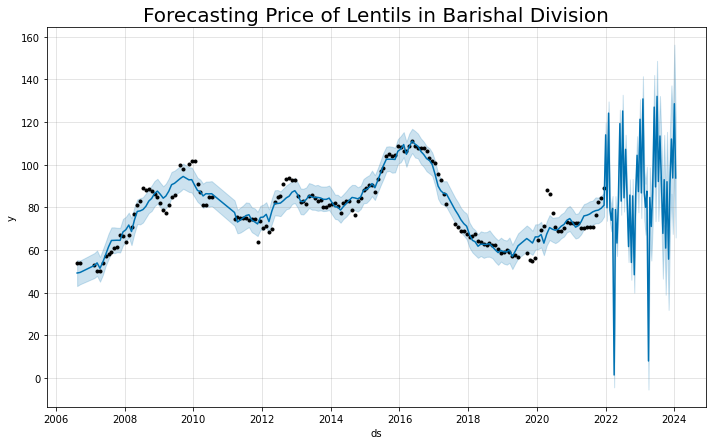

In [ ]:
m1 = Prophet(changepoint_prior_scale=0.5)
forecast1 = m1.fit(df).predict(future)
fig4 = m1.plot(forecast1)
a = fig4.gca()
a.set_title('Forecasting Price of Lentils in Barishal Division',size=20)

In [ ]:
from fbprophet.diagnostics import cross_validation
cv = cross_validation(m,initial = '100 days', period='50 days', horizon='300 days')

INFO:fbprophet:Making 105 forecasts with cutoffs between 2006-11-24 00:00:00 and 2021-02-18 00:00:00


  0%|          | 0/105 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbp

In [ ]:
cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
950,2021-08-15,61.115616,36.483050,85.023448,71.00,2021-02-18
951,2021-09-15,60.681122,34.672653,84.855334,76.51,2021-02-18
952,2021-10-15,60.260643,38.207099,83.234558,82.50,2021-02-18
953,2021-11-15,59.826148,35.341746,81.814087,84.44,2021-02-18
954,2021-12-15,59.405670,35.828099,82.097112,89.20,2021-02-18


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_pm = performance_metrics(cv)
E = pd.DataFrame(df_pm)
E.to_csv('/content//drive//MyDrive/Dataset//Lentils Barishal PM.csv')
#df_pm

In [1]:
col_list = ["date","price"]
import pandas as pd
df = pd.read_csv("Lentis Barishal.csv", usecols=col_list,parse_dates = ['date'])
df.head()

,date,price
0,2006-08-15,54.0
1,2006-09-15,54.0
2,2007-02-15,53.0
3,2007-03-15,50.0
4,2007-04-15,50.0


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

from darts import TimeSeries
from darts.models import (
    NaiveDrift,
    NaiveSeasonal,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    RegressionEnsembleModel,
    RegressionModel,
    Theta,
    FFT,
    RNNModel,
    NaiveEnsembleModel,
    NBEATSModel,
    TCNModel,
    AutoARIMA,
    TBATS
    
)

from darts.metrics import mae
from darts .utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis

import warnings
warnings.filterwarnings('ignore')

import logging 
logging.disable(logging.CRITICAL)

In [3]:
series = TimeSeries.from_dataframe(df, 'date','price',fill_missing_dates=True, freq='SM')#
series.head()

<TimeSeries (DataArray) (date: 5, component: 1, sample: 1)>
array([[[54.]],

       [[nan]],

       [[54.]],

       [[nan]],

       [[nan]]])
Coordinates:
  * date       (date) datetime64[ns] 2006-08-15 2006-08-31 ... 2006-10-15
  * component  (component) object 'price'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

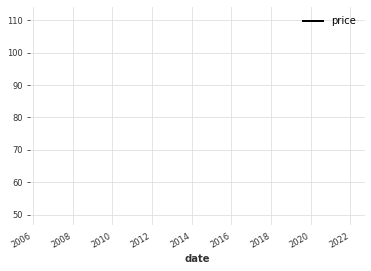

In [4]:
series.plot()

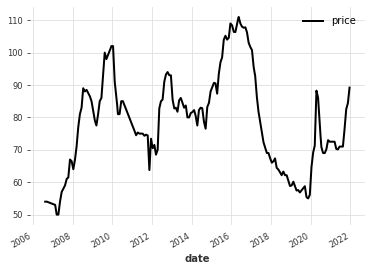

In [5]:
import darts
series = darts.utils.missing_values.fill_missing_values(series, fill='auto',)
series.plot()

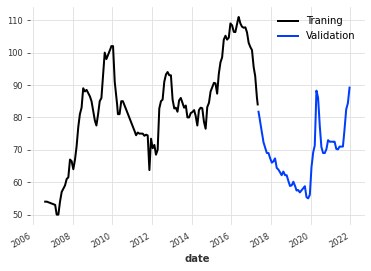

In [6]:
train, val = series.split_after(0.7)
train.plot(label = 'Traning')
val.plot(label = 'Validation')
plt.legend()

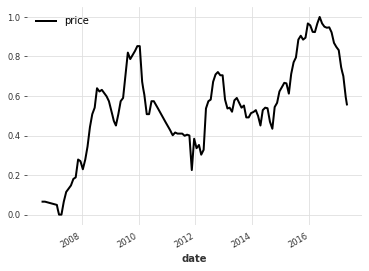

In [7]:
from darts.dataprocessing.transformers import Scaler

scaler = Scaler()
train_scaled = scaler.fit_transform(train)

train_scaled.plot()


Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

TCNModel = MAE :  21.334487839962968


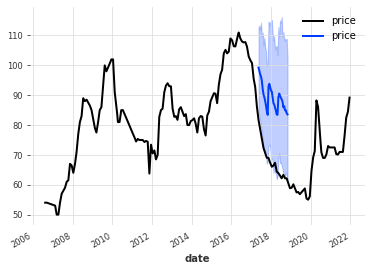

In [8]:
from darts.utils.likelihood_models import LaplaceLikelihood

model = TCNModel(
    input_chunk_length=24,
    output_chunk_length=12,
    random_state=42,
    likelihood=LaplaceLikelihood(),
)

model.fit(train_scaled, epochs=400, verbose=True);

pred = model.predict(n=36, num_samples=500)

# scale back:
pred = scaler.inverse_transform(pred)

series.plot()
pred.plot()

print("TCNModel = MAE : ",mae(series,pred))

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

NBEATSModel = MAE :  11.158852121444603


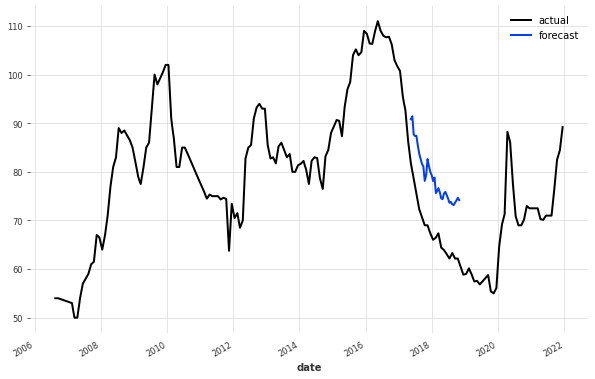

In [9]:
from darts.models import NBEATSModel

model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42)

model.fit(train_scaled, epochs=50, verbose=True);

pred = model.predict(n=36)


# scale back:
pred = scaler.inverse_transform(pred)

plt.figure(figsize=(10, 6))
series.plot(label="actual")
pred.plot(label="forecast")


print("NBEATSModel = MAE : ",mae(series,pred))

In [10]:
def evaluate_model(m):
    m.fit(train)
    forecast = m.predict(len(val))
    print("Model {} obtains MAE :{:}".format(m,mae(val,forecast)))

#evaluate_model(ExponentialSmoothing())
evaluate_model(TBATS())
evaluate_model(AutoARIMA())
evaluate_model(Theta())
evaluate_model(NaiveDrift())
evaluate_model(NaiveSeasonal())
evaluate_model(Prophet())
evaluate_model(ARIMA())
#evaluate_model(RegressionEnsembleModel())
#evaluate_model(RegressionModel())
evaluate_model(FFT())

Model (T)BATS obtains MAE :10.446910423480869
Model Auto-ARIMA obtains MAE :14.366869715916211
Model Theta(2) obtains MAE :19.883951454571648
Model Naive drift model obtains MAE :22.47090371928349
Model Naive seasonal model, with K=1 obtains MAE :16.25799279279279
Model Prophet obtains MAE :54.87512994142584
Model ARIMA(12, 1, 0) obtains MAE :14.167131308078135
Model FFT(nr_freqs_to_keep=10, trend=None) obtains MAE :15.527592263733167


  0%|          | 0/147 [00:00<?, ?it/s]

NaiveEnsembleModel = MAE =  4.972740128776976


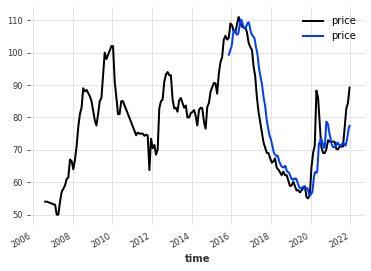

In [11]:
from darts.models import NaiveEnsembleModel

models = [NaiveDrift(), NaiveSeasonal(12)]

ensemble_model = NaiveEnsembleModel(models=models)

backtest = ensemble_model.historical_forecasts(
    series, start=0.6, forecast_horizon=3, verbose=True
)

print("NaiveEnsembleModel = MAE = " , (mae(backtest, series)))
series.plot()
backtest.plot()

Training: 0it [00:00, ?it/s]

  0%|          | 0/147 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

RNNModel = MAE =  4.970502874922508


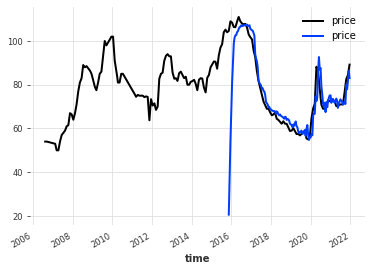

In [12]:
from darts.models import RNNModel

model = RNNModel(input_chunk_length=4)


model.fit(train_scaled)

backtest = model.historical_forecasts(series,start=0.6, forecast_horizon=3,verbose=True)
print("RNNModel = MAE = " , (mae(backtest, series)))
series.plot()
backtest.plot()